# Data preparation

In [1]:
import pandas as pd

### training data
anger_train = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

In [2]:
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

In [3]:
### testing data
anger_test = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df.head()

,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [4]:
# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

print("Shape of Training df: ", train_df.shape)
print("Shape of Testing df: ", test_df.shape)

Shape of Training df:  (3613, 4)
Shape of Testing df:  (347, 4)


---
### ** >>> Exercise 1 (Take home): **  
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()

In [6]:
train_counts = count_vect.fit_transform(train_df.text) #learn the vocabulary and return document-term matrix
train_counts.shape

(3613, 10115)

In [7]:
term_frequencies_in_trains = np.asarray(train_counts.sum(axis=0))[0]
# when we are sorting frequencies, indexs need to be swapped too
index_trains = np.argsort(term_frequencies_in_trains)[::-1]  # [::-1]: reverse
term_frequencies_in_trains = np.sort(term_frequencies_in_trains)[::-1]

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


<module 'matplotlib.pyplot' from 'C:\\Users\\user\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

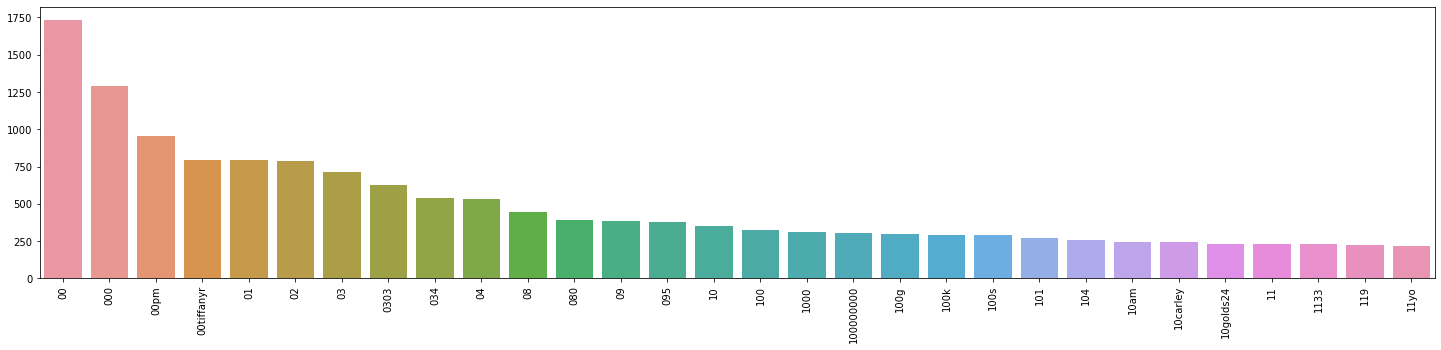

In [8]:
# we already get the indexes of sorted counts, and now we need to print it out
# use "temp" to store words
temp = []
for i in index_trains[:30]:
    temp.append(count_vect.get_feature_names()[i])

plt.subplots(figsize=(25, 5))
g = sns.barplot(x=temp, 
            y=term_frequencies_in_trains[:30])
g.set_xticklabels(count_vect.get_feature_names()[:30], rotation = 90)
plt

In [9]:
test_counts = count_vect.fit_transform(test_df.text)
test_counts.shape

(347, 1949)

In [10]:
term_frequencies_in_tests = np.asarray(test_counts.sum(axis=0))[0]
index_tests = np.argsort(term_frequencies_in_tests)[::-1]
term_frequencies_in_tests = np.sort(term_frequencies_in_tests)[::-1]

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


<module 'matplotlib.pyplot' from 'C:\\Users\\user\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

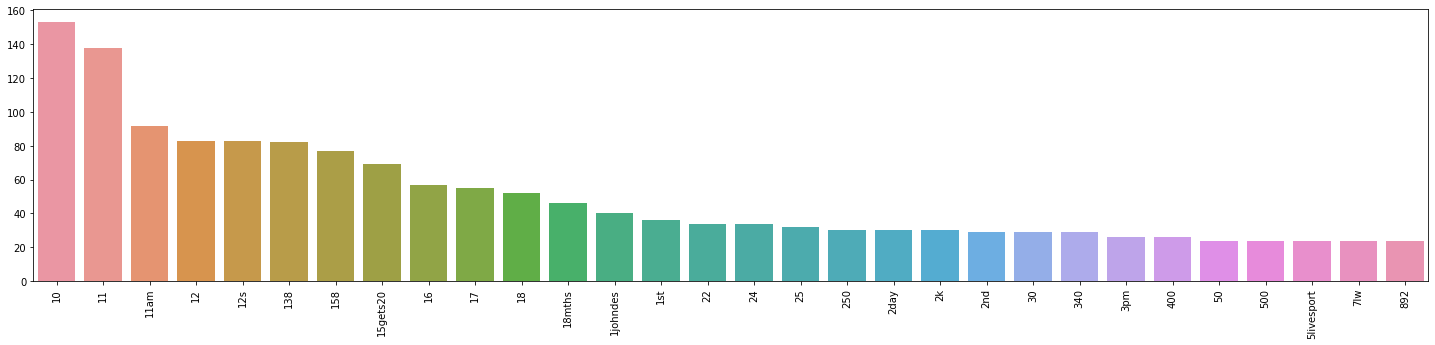

In [11]:
temp = []
for i in index_tests[:30]:
    temp.append(count_vect.get_feature_names()[i])

plt.subplots(figsize=(25, 5))
g = sns.barplot(x=temp, 
            y=term_frequencies_in_tests[:30])
g.set_xticklabels(count_vect.get_feature_names()[:30], rotation = 90)
plt

---
### ** >>> Exercise 2 (Take home): **  
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [12]:
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
TFIDF_vectorizer = TfidfVectorizer(max_features=1000, tokenizer=nltk.word_tokenize)

In [13]:
# 1. Learn a vocabulary dictionary of all tokens in the raw documents.
TFIDF_vectorizer.fit(train_df['text'])

# 2. Transform documents to document-term matrix.
train_data_TFIDF_features = TFIDF_vectorizer.transform(train_df['text'])

C:\Users\user\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:516: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [14]:
feature_names = TFIDF_vectorizer.get_feature_names()
feature_names[100:110]

['awful', 'b', 'baby', 'back', 'bad', 'ball', 'balls', 'bb18', 'bc', 'bday']

---
### ** >>> Exercise 3 (Take home): **  
Can you interpret the results ? What do they mean?

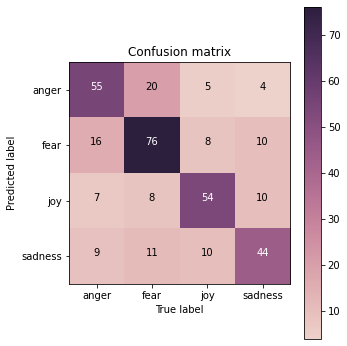

Answer:

After decision tree classified, we can see the majority of datas are well predicted, but there are still some minor datas mispredict. 

Another problem is the total number of datas in each category, apparently, "fear" has more datas then others', so creating more test datas can show more information about the model on different category.

---
### ** >>> Exercise 4 (Take home): **  
Build a model using a ```Naive Bayes``` model and train it. What are the testing results? 

In [15]:
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
BOW_vectorizer = CountVectorizer(max_features=1000, tokenizer=nltk.word_tokenize) 
BOW_vectorizer.fit(train_df['text'])

CountVectorizer(max_features=1000,
                tokenizer=<function word_tokenize at 0x000001E54F1C35E0>)

In [17]:
X_train = BOW_vectorizer.transform(train_df['text'])
Y_train = train_df.emotion

X_test = BOW_vectorizer.transform(test_df['text'])
Y_test = test_df.emotion

print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', Y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', Y_test.shape)

X_train.shape:  (3613, 1000)
y_train.shape:  (3613,)
X_test.shape:  (347, 1000)
y_test.shape:  (347,)


In [18]:
clf1 = MultinomialNB()
clf1.fit(X_train, Y_train)

Y_train_pred = clf1.predict(X_train)
Y_test_pred = clf1.predict(X_test)

In [19]:
acc_train = accuracy_score(y_true=Y_train, y_pred=Y_train_pred)
acc_test = accuracy_score(y_true=Y_test, y_pred=Y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))

training accuracy: 0.88
testing accuracy: 0.77


In [20]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=Y_test, y_pred=Y_test_pred))

              precision    recall  f1-score   support

       anger       0.74      0.76      0.75        84
        fear       0.78      0.79      0.78       110
         joy       0.85      0.78      0.82        79
     sadness       0.72      0.74      0.73        74

    accuracy                           0.77       347
   macro avg       0.77      0.77      0.77       347
weighted avg       0.77      0.77      0.77       347



In [21]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=Y_test, y_pred=Y_test_pred) 
print(cm)

[[64 11  4  5]
 [10 87  2 11]
 [ 7  5 62  5]
 [ 5  9  5 55]]


In [22]:
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'True label',
           ylabel = 'Predicted label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

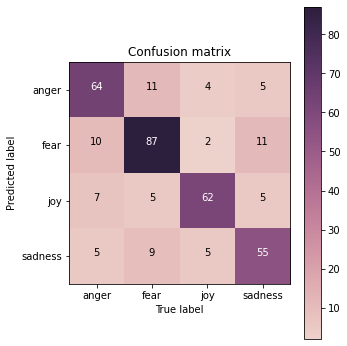

In [23]:
# plot your confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

---
### ** >>> Exercise 5 (Take home): **  

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

Answer:

根據上面各種評分結果，使用naive bayes會有比較好的表現。

如果訓練資料的某個feature非常重要，使用decision tree會有比較好的表現。相反如果每個feature都是相對重要，那麼用naive bayes會比較好。而且如果用decision tree，某些稀少的label很有可能會被過濾掉。

在這次的訓練中是使用BoW，我認為每個BoW都是相對重要的，因此naive bayes才會有比較好的結果。

另外如果改用TFIDF來進行訓練，也會有更好的結果。

# Deep learning model build

## prepare data
I use TFIDF feature

In [24]:
import keras

X_train = TFIDF_vectorizer.transform(train_df.text)
Y_train = train_df.emotion

X_test = TFIDF_vectorizer.transform(test_df.text)
Y_test = test_df.emotion

print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', Y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', Y_test.shape)

X_train.shape:  (3613, 1000)
y_train.shape:  (3613,)
X_test.shape:  (347, 1000)
y_test.shape:  (347,)


## one hot encoding

In [25]:
## deal with label (string -> one-hot)

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(Y_train)
print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('Y_train[0:4]:\n', Y_train[0:4])
print('\nY_train.shape: ', Y_train.shape)
print('Y_test.shape: ', Y_test.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

Y_train = label_encode(label_encoder, Y_train)
Y_test = label_encode(label_encoder, Y_test)

print('\n\n## After convert')
print('Y_train[0:4]:\n', Y_train[0:4])
print('\nY_train.shape: ', Y_train.shape)
print('Y_test.shape: ', Y_test.shape)

check label:  ['anger' 'fear' 'joy' 'sadness']

## Before convert
Y_train[0:4]:
 479     anger
2617      joy
422     anger
753     anger
Name: emotion, dtype: object

Y_train.shape:  (3613,)
Y_test.shape:  (347,)


## After convert
Y_train[0:4]:
 [[1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]

Y_train.shape:  (3613, 4)
Y_test.shape:  (347, 4)


## build model

In [26]:
# I/O check
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(3613, 1000)
(3613, 4)
(347, 1000)
(347, 4)


In [27]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(1000, ))
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=4)(H2)
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1000)]            0         
                                                                 
 dense (Dense)               (None, 64)                64064     
                                                                 
 re_lu (ReLU)                (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 re_lu_1 (ReLU)              (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 4)                 260       
                                                                 
 softmax (Softmax)           (None, 4)                 0     

In [28]:
print(type(X_train))


<class 'scipy.sparse.csr.csr_matrix'>


## train

In [29]:
# need to change to sparse tensor, so it can be model's input

import tensorflow as tf

def convert_sparse_matrix_to_sparse_tensor(X):
    coo = X.tocoo()
    indices = np.mat([coo.row, coo.col]).transpose()
    return tf.sparse.reorder(tf.SparseTensor(indices, coo.data, coo.shape))

X_train_enc = convert_sparse_matrix_to_sparse_tensor(X_train)
X_test_enc = convert_sparse_matrix_to_sparse_tensor(X_test)

In [30]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('logs/training_log.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_train_enc, Y_train, 
                    epochs=epochs, 
                    batch_size=batch_size,
                    callbacks=[csv_logger],
                    validation_data = (X_test_enc, Y_test))
print('training finish')

Epoch 1/25


C:\Users\user\anaconda3\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/model/dense/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/model/dense/embedding_lookup_sparse/Reshape:0", shape=(None, 64), dtype=float32), dense_shape=Tensor("gradient_tape/model/dense/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


113/113 [==============================] - 2s 9ms/step - loss: 1.3330 - accuracy: 0.3510 - val_loss: 1.2276 - val_accuracy: 0.5677
Epoch 2/25
113/113 [==============================] - 1s 8ms/step - loss: 0.7932 - accuracy: 0.7894 - val_loss: 0.7057 - val_accuracy: 0.7349
Epoch 3/25
113/113 [==============================] - 1s 8ms/step - loss: 0.3567 - accuracy: 0.8896 - val_loss: 0.6326 - val_accuracy: 0.7666
Epoch 4/25
113/113 [==============================] - 1s 8ms/step - loss: 0.2355 - accuracy: 0.9239 - val_loss: 0.6477 - val_accuracy: 0.7723
Epoch 5/25
113/113 [==============================] - 1s 8ms/step - loss: 0.1778 - accuracy: 0.9408 - val_loss: 0.6808 - val_accuracy: 0.7896
Epoch 6/25
113/113 [==============================] - 1s 8ms/step - loss: 0.1406 - accuracy: 0.9563 - val_loss: 0.7484 - val_accuracy: 0.7752
Epoch 7/25
113/113 [==============================] - 1s 8ms/step - loss: 0.1180 - accuracy: 0.9629 - val_loss: 0.8068 - val_accuracy: 0.7839
Epoch 8/25
113/11

## predict

In [31]:
## predict
pred_result = model.predict(X_test_enc, batch_size=128)
pred_result = label_decode(label_encoder, pred_result)
pred_result[:5]

3/3 [==============================] - 0s 5ms/step


array(['fear', 'fear', 'anger', 'fear', 'fear'], dtype=object)

In [32]:
from sklearn.metrics import accuracy_score

print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, Y_test), pred_result), 2)))

testing accuracy: 0.76


In [33]:
#Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv("logs/training_log.csv")
training_log

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.350955,1.332991,0.567723,1.227619
1,1,0.789372,0.793209,0.734870,0.705741
2,2,0.889565,0.356700,0.766571,0.632583
3,3,0.923886,0.235524,0.772334,0.647651
4,4,0.940769,0.177825,0.789625,0.680812
5,5,0.956269,0.140595,0.775216,0.748366
6,6,0.962912,0.117994,0.783862,0.806768
7,7,0.968724,0.100036,0.772334,0.841984
8,8,0.972322,0.085886,0.766571,0.891884
9,9,0.973429,0.077345,0.766571,0.972521


---
### ** >>> Exercise 6 (Take home): **  

    Plot the Training and Validation Accuracy and Loss (different plots), just like the images below.(Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?
<table><tr>
    <td><img src="pics/pic3.png" style="width: 300px;"/> </td>
    <td><img src="pics/pic4.png" style="width: 300px;"/> </td>
</tr></table>

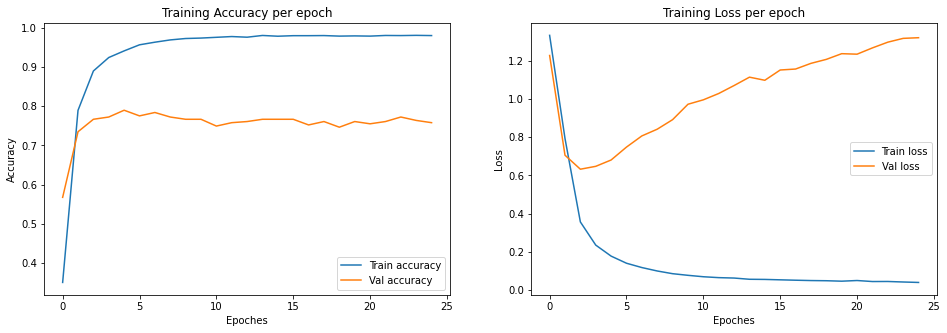

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 5))
fig = plt.subplot(1, 2, 1)

fig.plot(training_log.epoch, training_log.accuracy, label='Train accuracy')
fig.plot(training_log.epoch, training_log.val_accuracy, label='Val accuracy')
fig.set_xlabel('Epoches')
fig.set_ylabel('Accuracy')
fig.set_title('Training Accuracy per epoch')
fig.legend()

fig = plt.subplot(1, 2, 2)

fig.plot(training_log.epoch, training_log.loss, label='Train loss')
fig.plot(training_log.epoch, training_log.val_loss, label='Val loss')
fig.set_xlabel('Epoches')
fig.set_ylabel('Loss')
fig.set_title('Training Loss per epoch')
fig.legend()

plt.show()

Discussion:

我認為因為資料集還算小，而且這是binary classification，所以用簡單的模型即可train出好的結果。

從accuracy可以看到，前10個epoch基本上就已經train到一個穩定的地方。

從loss也可以看到train loss有很明顯的下降，所以也算是有train到。

然而在test的部分，因為是沒看過的資料，所以在accuracy和loss都會表現較差。

而loss在後面甚至越來越高，有可能因為模型過度符合training data，在不到5個epoch就有overfit的現象。

# W2V

In [35]:
## check library
import gensim

## the input type
train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))
train_df[['id', 'text', 'text_tokenized']].head()

,id,text,text_tokenized
479,10479,Nick said he's territorial and he'll growl if ...,"[Nick, said, he, 's, territorial, and, he, 'll..."
2617,30613,#Talking about our #Problems is our greatest #...,"[#, Talking, about, our, #, Problems, is, our,..."
422,10422,Drop Snapchat names #bored #snap #swap #pics,"[Drop, Snapchat, names, #, bored, #, snap, #, ..."
753,10753,@Klipto the orange one is #poisonous and #bitt...,"[@, Klipto, the, orange, one, is, #, poisonous..."
682,10682,I can't guess if you holding a grudge against...,"[I, ca, n't, guess, if, you, holding, a, grudg..."


In [36]:
## create the training corpus
training_corpus = train_df['text_tokenized'].values
training_corpus[:3]

array([list(['Nick', 'said', 'he', "'s", 'territorial', 'and', 'he', "'ll", 'growl', 'if', 'someone', 'gets', 'too', 'close', 'to', 'me', '#', 'hesananimal']),
       list(['#', 'Talking', 'about', 'our', '#', 'Problems', 'is', 'our', 'greatest', '#', 'Addiction', '#', 'Break', 'the', '#', 'habitTalk', 'about', 'ur', '#', 'Joys', '#', 'quote', '#', 'optimism', '#', 'problemsolving', '#', 'behappy']),
       list(['Drop', 'Snapchat', 'names', '#', 'bored', '#', 'snap', '#', 'swap', '#', 'pics'])],
      dtype=object)

use pretrained model GoogleNews-vectors-negative300

In [37]:
from gensim.models import KeyedVectors

## Note: this model is very huge, this will take some time ...
model_path = "GoogleNews/GoogleNews-vectors-negative300.bin.gz"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

w2v_google_model.most_similar('happy', topn=10)

load ok


[('glad', 0.7408890724182129),
 ('pleased', 0.6632170677185059),
 ('ecstatic', 0.6626912355422974),
 ('overjoyed', 0.6599286794662476),
 ('thrilled', 0.6514049172401428),
 ('satisfied', 0.6437949538230896),
 ('proud', 0.636042058467865),
 ('delighted', 0.6272379159927368),
 ('disappointed', 0.6269949674606323),
 ('excited', 0.6247665882110596)]

---
### ** >>> Exercise 7 (Take home): **  

Now, we have the word vectors, but our input data is a sequence of words (or say sentence). 
How can we utilize these "word" vectors to represent the sentence data and train our model?

Answer:

First, we need to tokenize our sentences. After tokenized, put each word into w2v model, it should output each word's vector.
The dimension of vector is according to the pretrained model we use.

In our model, if it is DL, we can use embedding layer to give each vector an implied meaning, then it can be put into model for training.

For the exmaple code about w2v model, I use "glove-twitter" w2v model in kaggle competition.

---
### ** >>> Exercise 8 (Take home): **  

Generate a t-SNE visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total).

In [38]:
word_list = ['angry', 'happy', 'sad', 'fear']

topn = 15
angry_words = [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]
happy_words = [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]        
sad_words = [word_ for word_, sim_ in w2v_google_model.most_similar('sad', topn=topn)]        
fear_words = [word_ for word_, sim_ in w2v_google_model.most_similar('fear', topn=topn)]        

target_words = angry_words + happy_words + sad_words + fear_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn
color = ['red'] * cn + ['yellow'] * cn + ['gray'] * cn + ['black'] * cn
print(color)


target words: 
['irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'agitated', 'frustrated', 'furious', 'unhappy', 'outraged', 'livid', 'irritated', 'exasperated', 'angrier', 'Angry', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirschbeck', 'elated', 'thankful', 'unhappy', 'saddening', 'Sad', 'saddened', 'heartbreaking', 'disheartening', 'Meny_Friedman', 'parishioner_Pat_Patello', 'saddens_me', 'distressing', 'reminders_bobbing', 'Turkoman_Shiites', 'saddest', 'unfortunate', 'sorry', 'bittersweet', 'fearful', 'fears', 'Fear', 'fearing', 'worry', 'dread', 'feared', 'anxiety', 'apprehension', 'afraid', 'worries', 'concern', 'distrust', 'worried', 'Fearful']

color list:
['red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 

C:\Users\user\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:819: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(


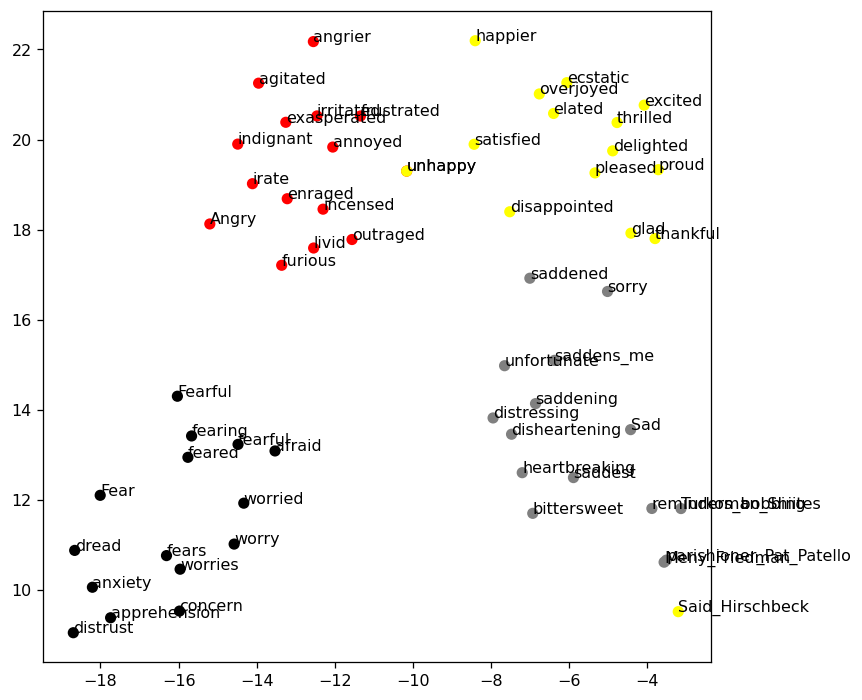

In [39]:
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()